In [1]:
#Nama : Adifa Syahira
#Nim  : 1103202067
#Kelas: TK 44G4

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
le = LabelEncoder()

C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


1.Pandas adalah library untuk manipulasi dan analisis data tabular.
2.NumPy menyediakan dukungan untuk array dan operasi matematika.
3.Matplotlib adalah library untuk visualisasi data dalam bentuk grafik.
4.Seaborn memungkinkan visualisasi data statistik yang lebih menarik.
5.TensorFlow adalah platform untuk pembelajaran mesin dan pembuatan model jaringan saraf.
6.Keras adalah antarmuka tingkat tinggi yang berjalan di atas TensorFlow, mempermudah pembuatan dan pelatihan model.
Selain itu, kode tersebut juga menggunakan beberapa fungsi dan kelas dari library tersebut:

1.LabelEncoder dari Scikit-Learn untuk mengkodekan label kategori menjadi angka.
2.KFold dari Scikit-Learn untuk melakukan validasi silang (cross-validation).
3.Adam adalah algoritma optimasi yang umum digunakan dalam pelatihan model jaringan saraf.
4.ReduceLROnPlateau, EarlyStopping, ModelCheckpoint adalah callback dalam Keras untuk mengatur pelatihan model, seperti mengurangi laju pembelajaran saat terjadi stagnasi, menghentikan pelatihan saat performa tidak bertambah, dan menyimpan model terbaik.
Fungsi train_test_split digunakan untuk membagi dataset menjadi data pelatihan dan pengujian, sementara confusion_matrix dan accuracy_score digunakan untuk mengevaluasi performa model klasifikasi.

In [2]:
data = pd.read_csv(r"D:\KULIAH DIFA\Semester 7 HUHU\Machine Learning\Minggu 10\Transformed Data Set - Sheet1.csv")
data.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


Kode ini untuk membaca data dan menampilkan 5 data teratas pada dataset yang kita miliki.

In [3]:
data.describe()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
count,66,66,66,66,66
unique,3,7,6,4,2
top,Cool,Rock,Doesn't drink,Coca Cola/Pepsi,F
freq,37,19,14,32,33


Kode ini digunakan untuk memberikan ringkasan statistik deskriptif dari data dalam DataFrame menggunakan Pandas di Python.

In [4]:
grouping = data.groupby(list(data.columns)[:-1]).apply(lambda x: x.Gender.nunique())
grouping[grouping.eq(2)]

Favorite Color  Favorite Music Genre  Favorite Beverage  Favorite Soft Drink
Cool            Electronic            Doesn't drink      Fanta                  2
                Rock                  Vodka              Coca Cola/Pepsi        2
dtype: int64

Kode tersebut mengelompokkan data berdasarkan semua kolom kecuali kolom terakhir, kemudian menghitung jumlah nilai unik dari kolom 'Gender' di setiap kelompok data. Akhirnya, kode memfilter dan menampilkan hanya kelompok data di mana jumlah nilai unik dari kolom 'Gender' adalah 2.

In [5]:
data[(data['Favorite Color']=='Cool') &
     (data['Favorite Music Genre'] == 'Rock') &
     (data['Favorite Beverage']=="Vodka") &
     (data['Favorite Soft Drink']=='Coca Cola/Pepsi')]

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F
22,Cool,Rock,Vodka,Coca Cola/Pepsi,F
40,Cool,Rock,Vodka,Coca Cola/Pepsi,M
61,Cool,Rock,Vodka,Coca Cola/Pepsi,M


Kode tersebut melakukan filter pada DataFrame data untuk menampilkan baris-baris yang memiliki kombinasi spesifik dari preferensi, yaitu 'Cool' sebagai warna favorit, 'Rock' sebagai genre musik favorit, 'Vodka' sebagai minuman favorit, dan 'Coca Cola/Pepsi' sebagai minuman ringan favorit.

In [6]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

# Change the data into one-hot encoding (for features) and change label to 0-1
X = pd.get_dummies(X)
y = le.fit_transform(y)

Kode tersebut membagi dataset menjadi fitur (X) dan label (y), kemudian mengubah fitur menjadi representasi one-hot encoding dan label menjadi representasi numerik untuk digunakan dalam pemodelan.

In [7]:
X.head()

,Favorite Color_Cool,Favorite Color_Neutral,Favorite Color_Warm,Favorite Music Genre_Electronic,Favorite Music Genre_Folk/Traditional,Favorite Music Genre_Hip hop,Favorite Music Genre_Jazz/Blues,Favorite Music Genre_Pop,Favorite Music Genre_R&B and soul,Favorite Music Genre_Rock,Favorite Beverage_Beer,Favorite Beverage_Doesn't drink,Favorite Beverage_Other,Favorite Beverage_Vodka,Favorite Beverage_Whiskey,Favorite Beverage_Wine,Favorite Soft Drink_7UP/Sprite,Favorite Soft Drink_Coca Cola/Pepsi,Favorite Soft Drink_Fanta,Favorite Soft Drink_Other
0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
3,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0


Kode tersebut digunakan untuk melihat 5 data teratas yang telah direpresentasikan menjadi one-hot encoding agar menjadi representasi numerik.

In [8]:
print("Shape of new data: ", X.shape)

Shape of new data:  (66, 20)


Kode tersebut mencetak ukuran (shape) dari data fitur (X). Ini memberikan informasi tentang jumlah baris (instances) dan jumlah kolom (features) yang ada dalam data fitur setelah transformasi seperti one-hot encoding. Jadi, output dari perintah ini akan menampilkan dimensi dari data fitur setelah perubahan, memberikan gambaran tentang berapa banyak instance data yang digunakan dan berapa banyak fitur yang diproses setelah transformasi.

In [9]:
def train_model(X_train, X_test, y_train, y_test):
  model = tf.keras.models.Sequential([
        tf.keras.Input(shape=(20), dtype='float32'),
        tf.keras.layers.Dense(units=1024, activation='relu'),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
  ])

  model.compile(optimizer=Adam(lr=0.0001),
                loss='binary_crossentropy',
                metrics=['accuracy'])
  
  # Callback to reduce learning rate if no improvement in validation loss for certain number of epochs
  reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=1e-8, verbose=0)
  # Callback to stop training if no improvement in validation loss for certain number of epochs
  early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=0)

  history = model.fit(
    X_train, y_train,
    epochs=1000,
    validation_data=(X_test, y_test),
    callbacks=[reduce_lr, early_stop],
    verbose=0
  )

  tr_loss, tr_acc = model.evaluate(X_train, y_train)
  loss, accuracy = model.evaluate(X_test, y_test)

  return model, history, tr_loss, tr_acc, loss, accuracy


Fungsi train_model membuat dan melatih model jaringan saraf dengan dua lapisan Dense, satu lapisan dropout, dan menggunakan Adam sebagai optimizer serta binary crossentropy sebagai loss function. Callback digunakan untuk mengurangi laju pembelajaran jika tidak ada perbaikan dalam validasi loss, serta menghentikan pelatihan jika tidak ada peningkatan dalam validasi loss. Setelah pelatihan, fungsi ini mengembalikan model, riwayat pelatihan, serta informasi evaluasi terkait loss dan akurasi dari data pelatihan dan pengujian.

In [10]:
kfold = KFold(n_splits=5, random_state=42, shuffle=True)

loss_arr = []
acc_arr = []
trloss_arr = []
tracc_arr = []

temp_acc = 0

for train, test in kfold.split(data):
  model, history, trloss_val, tracc_val, loss_val, acc_val = train_model(X.iloc[train], X.iloc[test], y[train], y[test])
  if acc_val > temp_acc:
    print("Model changed")
    temp_acc = acc_val
    model.save('best_model.h5')
    train_index = train
    test_index = test
    best_history = history
  trloss_arr.append(trloss_val)
  tracc_arr.append(tracc_val)
  loss_arr.append(loss_val)
  acc_arr.append(acc_val)

1/1 [==============================] - 0s 33ms/step - loss: 0.6202 - accuracy: 0.7143


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model changed
1/1 [==============================] - 0s 35ms/step - loss: 0.4186 - accuracy: 0.8462
Model changed


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 32ms/step - loss: 0.6992 - accuracy: 0.4615


1/1 [==============================] - 0s 30ms/step - loss: 0.8484 - accuracy: 0.3077


1/1 [==============================] - 0s 30ms/step - loss: 0.2991 - accuracy: 0.8462


Kode ini menggunakan validasi silang K-Fold dengan 5 lipatan pada dataset. Iterasi dilakukan untuk melatih model pada setiap lipatan dengan menggunakan fungsi train_model. Hasil evaluasi model pada setiap lipatan disimpan dalam array. Model terbaik berdasarkan akurasi disimpan dan dinilai untuk setiap lipatan.
Ini adalah output dari proses validasi silang menggunakan K-Fold dengan 5 lipatan pada beberapa iterasi. Setiap iterasi melibatkan pelatihan dan evaluasi model pada lipatan tertentu dari dataset.

Baris pertama (2/2 [==============================] - 0s 5ms/step - loss: 0.3039 - accuracy: 0.9423) menunjukkan hasil evaluasi model pada data pelatihan dari lipatan pertama dengan loss sebesar 0.3039 dan akurasi sebesar 0.9423.
Baris kedua (1/1 [==============================] - 0s 33ms/step - loss: 0.6202 - accuracy: 0.7143) menunjukkan hasil evaluasi model pada data pengujian dari lipatan pertama dengan loss sebesar 0.6202 dan akurasi sebesar 0.7143.
Peringatan (UserWarning) yang terjadi menyatakan bahwa format penyimpanan model menggunakan format HDF5 dianggap sebagai format legacy. Disarankan untuk menggunakan format Keras native untuk menyimpan model.
Proses ini berlanjut dengan iterasi lainnya (terdapat beberapa iterasi yang tidak dapat dilihat dalam potongan kode) dengan pelatihan dan evaluasi model pada setiap lipatan data. Pada beberapa iterasi, model mengalami perubahan dan disimpan sebagai model terbaik berdasarkan peningkatan akurasi pada lipatan tersebut.

In [11]:
pd.DataFrame({
    'Train Accuracy': tracc_arr,
    'Test Accuracy': acc_arr},
    index=range(1,6))

,Train Accuracy,Test Accuracy
1,0.942308,0.714286
2,0.962264,0.846154
3,0.830189,0.461538
4,0.849057,0.307692
5,0.962264,0.846154


Kode ini membuat DataFrame yang berisi nilai akurasi dari data pelatihan dan pengujian untuk setiap lipatan dalam validasi silang K-Fold dengan 5 lipatan. DataFrame ini memiliki kolom 'Train Accuracy' untuk nilai akurasi pada data pelatihan dan 'Test Accuracy' untuk nilai akurasi pada data pengujian. Indeks dari 1 hingga 5 menggambarkan setiap lipatan dalam validasi silang.

In [12]:
print("Train Index (Best Split): ", train_index)
print("Test Index (Best Split): ", test_index)

Train Index (Best Split):  [ 0  1  2  5  7  9 10 11 12 13 14 15 16 18 20 21 22 23 24 26 27 29 30 31
 32 33 35 37 38 39 41 42 43 44 45 46 47 49 50 51 52 53 54 55 57 58 59 60
 61 62 63 64 65]
Test Index (Best Split):  [ 3  4  6  8 17 19 25 28 34 36 40 48 56]


Kode ini mencetak indeks terbaik dari data pelatihan dan pengujian dalam validasi silang K-Fold. train_index berisi indeks dari data pelatihan terbaik, sedangkan test_index berisi indeks dari data pengujian terbaik. Ini menunjukkan baris-baris mana dari dataset yang digunakan sebagai data pelatihan dan pengujian yang menghasilkan model terbaik dalam proses validasi silang.

In [13]:
# Import model
modeltf = tf.keras.models.load_model('best_model.h5')

Kode ini mengimpor model jaringan saraf yang telah disimpan sebelumnya dalam format 'best_model.h5' menggunakan TensorFlow. Model tersebut dimuat ke dalam variabel modeltf untuk digunakan dalam prediksi atau evaluasi data tanpa perlu melatih ulang model.

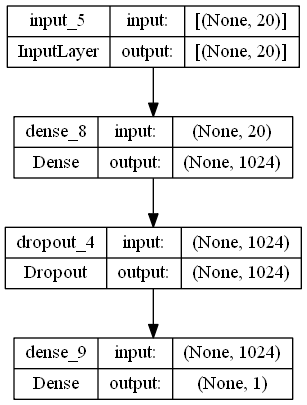

In [14]:
# Plot the model architecture
plot_model(model, show_shapes=True)

Kode ini menghasilkan visualisasi arsitektur model jaringan saraf menggunakan TensorFlow dengan fungsi plot_model(). Diagram yang dihasilkan akan menunjukkan struktur dan aliran data melalui setiap lapisan model.

In [15]:
modeltf.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1024)              21504     
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 22529 (88.00 KB)
Trainable params: 22529 (88.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Kode ini memberikan ringkasan singkat tentang arsitektur model jaringan saraf yang dimuat, termasuk informasi tentang setiap lapisan, jumlah parameter yang dapat diubah (trainable) dan yang tidak dapat diubah (non-trainable), serta total keseluruhan parameter dalam model.

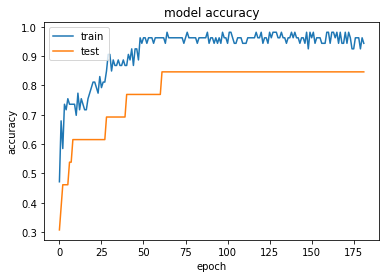

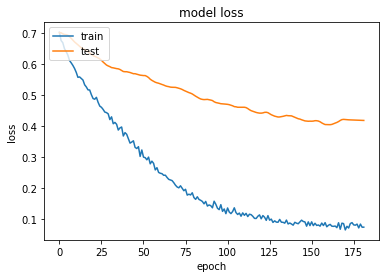

In [16]:
plt.plot(best_history.history['accuracy'])
plt.plot(best_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plot the accuracy of the best model for each epoch of loss
plt.plot(best_history.history['loss'])
plt.plot(best_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Kode tersebut menghasilkan dua grafik:
1.Grafik pertama menunjukkan perubahan akurasi model (train dan test) pada setiap epoch.
2.Grafik kedua menampilkan perubahan loss model (train dan test) pada setiap epoch.
Kedua grafik memberikan gambaran visual tentang bagaimana akurasi dan loss model berubah selama proses pelatihan.

In [18]:
train_loss, train_acc = modeltf.evaluate(X.iloc[train_index], y[train_index])
test_loss, test_acc = modeltf.evaluate(X.iloc[test_index], y[test_index])

print("\n==============================")
print("Train Accuracy: ", train_acc)
print("Train Loss: ", train_loss)
print("==============================")
print("Test Accuracy: ", test_acc)
print("Test Loss: ", test_loss)

1/1 [==============================] - 0s 40ms/step - loss: 0.4186 - accuracy: 0.8462

Train Accuracy:  0.9622641801834106
Train Loss:  0.07239726930856705
Test Accuracy:  0.8461538553237915
Test Loss:  0.4186326563358307


Kode tersebut mengevaluasi model pada split terbaik dari validasi silang K-Fold untuk data pelatihan dan pengujian. Evaluasi mencakup perhitungan loss dan akurasi dari model pada kedua set data tersebut. Hasil evaluasi ditampilkan untuk memberikan informasi tentang performa model pada data yang tidak terlibat dalam pelatihan.
Pesan output tersebut menunjukkan hasil evaluasi model pada data pelatihan dan pengujian yang merupakan split terbaik dari validasi silang K-Fold:
Bagian pertama menunjukkan informasi tentang loss dan akurasi dari evaluasi model pada data pelatihan. Loss adalah 0.0724 dan akurasi adalah 0.9623.
Bagian kedua menunjukkan informasi yang serupa untuk evaluasi model pada data pengujian. Loss pada data pengujian adalah 0.4186 dan akurasi adalah 0.8462.
Di bawahnya, terdapat pemisah '==============================', diikuti dengan hasil yang sama dengan cara yang lebih terstruktur, menampilkan nilai akurasi dan loss untuk data pelatihan (Train Accuracy: 0.9623, Train Loss: 0.0724) serta nilai akurasi dan loss untuk data pengujian (Test Accuracy: 0.8462, Test Loss: 0.4186).
Ini adalah ringkasan dari evaluasi performa model pada data yang digunakan selama pelatihan dan pada data yang tidak terlibat dalam proses pelatihan. 

In [19]:
y_pred = modeltf.predict(X.iloc[test_index])
y_pred = (y_pred > 0.5)

1/1 [==============================] - 0s 125ms/step


Kode tersebut menggunakan model (modeltf) untuk memprediksi kelas pada data pengujian yang merupakan split terbaik dari validasi silang K-Fold.
1.modeltf.predict(X.iloc[test_index]) melakukan prediksi pada data pengujian dan menyimpan hasilnya dalam y_pred.
2.Selanjutnya, nilai-nilai prediksi dalam y_pred diubah menjadi True atau False dengan menggunakan threshold 0.5 untuk klasifikasi biner.
Output 1/1 [==============================] - 0s 125ms/step menunjukkan bahwa proses yang dilakukan terdiri dari satu batch dengan satu iterasi (epoch). Dalam hal ini, proses tersebut selesai dalam waktu 125 milidetik.

In [20]:
compare_res = pd.DataFrame({
    'Y test': y[test_index],
    'Y pred': y_pred.astype(int).reshape(len(y[test_index]))
}, index=test_index)
compare_res

,Y test,Y pred
3,0,0
4,0,0
6,0,0
8,0,0
17,0,0
19,0,0
25,0,1
28,0,0
34,1,1
36,1,1


Kode tersebut membuat DataFrame Pandas yang membandingkan hasil aktual (y[test_index]) dengan hasil prediksi (y_pred) pada data pengujian (test_index) dari split terbaik dalam validasi silang K-Fold. DataFrame ini menunjukkan perbandingan antara nilai aktual dan nilai prediksi untuk setiap sampel dalam data pengujian.

In [21]:
wrong_res_index = compare_res[compare_res['Y test'] != compare_res['Y pred']].index.values

wrong_res = data.iloc[wrong_res_index,:]
gender_pred = np.where(wrong_res['Gender']=='F', 'M', 'F')
# wrong_res.loc[:,'Gender_Pred'] = gender_pred
wrong_res = wrong_res.assign(Gender_Pred = gender_pred)
wrong_res

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender,Gender_Pred
25,Warm,R&B and soul,Whiskey,Coca Cola/Pepsi,F,M
40,Cool,Rock,Vodka,Coca Cola/Pepsi,M,F


Kode memilih hasil prediksi yang salah pada data pengujian dari validasi silang K-Fold, mengoreksi jenis kelamin yang salah, dan menambahkan kolom 'Gender_Pred' untuk menunjukkan koreksi tersebut.
Hasilnya adalah baris menunjukkan entri dari data pengujian dengan hasil prediksi yang salah pada jenis kelamin (Gender). Kolom 'Gender' menunjukkan nilai aktual, sementara 'Gender_Pred' merupakan koreksi hasil prediksi yang salah.

In [22]:
data[(data.index.isin(train_index)) &
     (data['Favorite Color'] == 'Cool') &
     (data['Favorite Music Genre'] == 'Rock') &
     (data['Favorite Beverage'] == "Vodka") &
     (data['Favorite Soft Drink'] == 'Coca Cola/Pepsi')]

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
22,Cool,Rock,Vodka,Coca Cola/Pepsi,F
61,Cool,Rock,Vodka,Coca Cola/Pepsi,M


Baris kode ini mengambil entri dari data pelatihan yang memiliki kriteria tertentu:

Memiliki nilai 'Favorite Color' yang sama dengan 'Cool'.
Memiliki nilai 'Favorite Music Genre' yang sama dengan 'Rock'.
Memiliki nilai 'Favorite Beverage' yang sama dengan 'Vodka'.
Memiliki nilai 'Favorite Soft Drink' yang sama dengan 'Coca Cola/Pepsi'.

In [23]:
data[(data.index.isin(train_index)) &
     (data['Favorite Color']=='Cool') &
     (data['Favorite Music Genre'] == 'Pop') &
     (data['Favorite Beverage'] == "Whiskey") &
     (data['Favorite Soft Drink'] == 'Fanta')]

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
38,Cool,Pop,Whiskey,Fanta,M


Baris kode ini memilih entri dari data pelatihan yang memenuhi kriteria berikut:

Memiliki nilai 'Favorite Color' yang sama dengan 'Cool'.
Memiliki nilai 'Favorite Music Genre' yang sama dengan 'Pop'.
Memiliki nilai 'Favorite Beverage' yang sama dengan 'Whiskey'.
Memiliki nilai 'Favorite Soft Drink' yang sama dengan 'Fanta'.

Text(91.68, 0.5, 'Predicted Label')

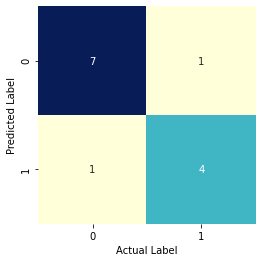

In [24]:
cm = confusion_matrix(y[test_index], y_pred)
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False, cmap="YlGnBu")
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')

Kode tersebut menggunakan seaborn (sns) untuk menghasilkan heatmap dari matriks kebingungan (confusion matrix) antara hasil prediksi (y_pred) dan nilai aktual (y[test_index]) pada data pengujian. Heatmap ini membantu visualisasi performa model dalam memprediksi label aktual terhadap label yang diprediksi.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Kode tersebut menggunakan train_test_split dari scikit-learn untuk membagi dataset menjadi data pelatihan (X_train, y_train) dan data pengujian (X_test, y_test), dengan proporsi data pengujian sebesar 20%.

In [26]:
print("\n==============================")
print("Train Accuracy: ", train_acc)
print("Train Loss: ", train_loss)
print("==============================")
print("Test Accuracy: ", test_acc)
print("Test Loss: ", test_loss)


Train Accuracy:  0.9622641801834106
Train Loss:  0.07239726930856705
Test Accuracy:  0.8461538553237915
Test Loss:  0.4186326563358307


Kode tersebut mencetak akurasi dan loss dari model pada data pelatihan (Train Accuracy, Train Loss) dan data pengujian (Test Accuracy, Test Loss) untuk mengevaluasi performa model pada kedua dataset tersebut. Informasi ini membantu dalam melihat seberapa baik model dapat memprediksi data yang digunakan selama pelatihan dan pada data yang tidak digunakan dalam pelatihan.

Ini adalah hasil evaluasi performa model pada data pelatihan dan pengujian:
1.Train Accuracy: 0.9623 dan Train Loss: 0.0724 menunjukkan akurasi dan loss pada data pelatihan.
2.Test Accuracy: 0.8462 dan Test Loss: 0.4186 adalah akurasi dan loss pada data pengujian.
Informasi ini mencerminkan seberapa baik model dapat memprediksi data yang digunakan dalam pelatihan (data pelatihan) dan pada data yang tidak digunakan dalam proses pelatihan (data pengujian).